In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_Disease",
    shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [3]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    print(image_batch[0].numpy)

tf.Tensor(
[[[116. 107. 110.]
  [111. 102. 105.]
  [111. 102. 105.]
  ...
  [133. 127. 129.]
  [144. 138. 140.]
  [154. 148. 150.]]

 [[102.  93.  96.]
  [104.  95.  98.]
  [111. 102. 105.]
  ...
  [139. 133. 135.]
  [142. 136. 138.]
  [147. 141. 143.]]

 [[ 96.  87.  90.]
  [101.  92.  95.]
  [109. 100. 103.]
  ...
  [142. 136. 138.]
  [142. 136. 138.]
  [143. 137. 139.]]

 ...

 [[148. 146. 151.]
  [142. 140. 145.]
  [118. 116. 121.]
  ...
  [179. 177. 182.]
  [178. 176. 181.]
  [178. 176. 181.]]

 [[134. 132. 137.]
  [125. 123. 128.]
  [100.  98. 103.]
  ...
  [181. 179. 184.]
  [182. 180. 185.]
  [182. 180. 185.]]

 [[161. 159. 164.]
  [139. 137. 142.]
  [ 98.  96. 101.]
  ...
  [174. 172. 177.]
  [175. 173. 178.]
  [176. 174. 179.]]], shape=(256, 256, 3), dtype=float32)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[116., 107., 110.],
        [111., 102., 105.],
        [111., 102., 105.],
        ...,
        [133., 127., 1

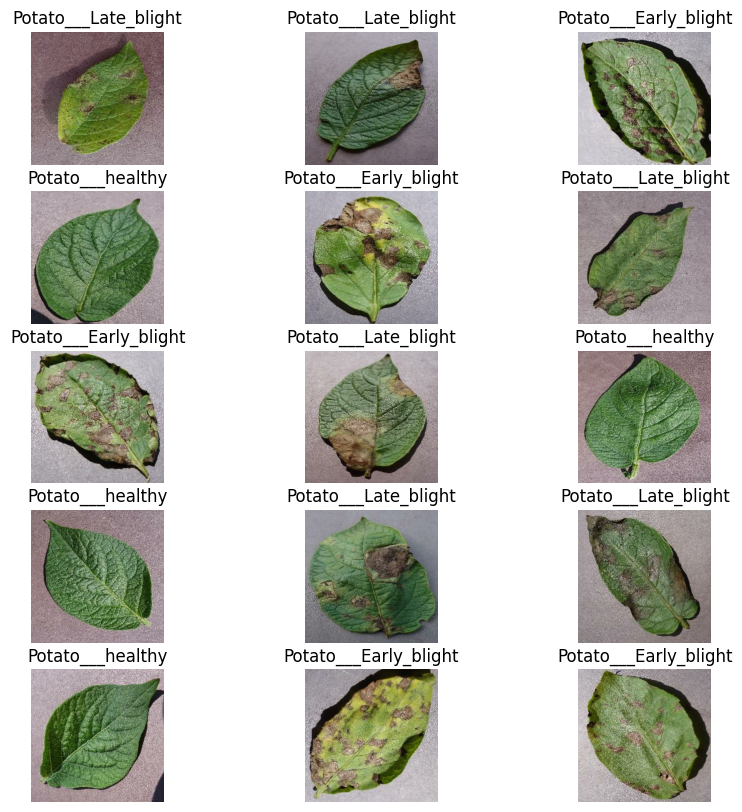

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(15):
          ax=plt.subplot(5,3,i+1)
          plt.imshow(image_batch[i].numpy().astype('uint8'))
          plt.title(class_name[label_batch[i]])
          plt.axis('off')

In [6]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds=get_dataset(dataset)

In [8]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
CHANNELS=3
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
#      resize_and_rescale,
#      data_augmentation,
     layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),

     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax'),  
])
model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
Result=model.fit(
    train_ds,
    epochs=40,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/40
54/54 [==============================] - 68s 1s/step - loss: 1.2441 - accuracy: 0.5758 - val_loss: 0.6515 - val_accuracy: 0.7760
Epoch 2/40
54/54 [==============================] - 70s 1s/step - loss: 0.5089 - accuracy: 0.8137 - val_loss: 0.4610 - val_accuracy: 0.8073
Epoch 3/40
54/54 [==============================] - 69s 1s/step - loss: 0.4056 - accuracy: 0.8438 - val_loss: 0.3542 - val_accuracy: 0.8958
Epoch 4/40
54/54 [==============================] - 70s 1s/step - loss: 0.2363 - accuracy: 0.8999 - val_loss: 0.2290 - val_accuracy: 0.9115
Epoch 5/40
54/54 [==============================] - 67s 1s/step - loss: 0.2110 - accuracy: 0.9149 - val_loss: 0.1970 - val_accuracy: 0.9427
Epoch 6/40
54/54 [==============================] - 69s 1s/step - loss: 0.1100 - accuracy: 0.9606 - val_loss: 0.2717 - val_accuracy: 0.8854
Epoch 7/40
54/54 [==============================] - 68s 1s/step - loss: 0.1216 - accuracy: 0.9583 - val_loss: 0.1613 - val_accuracy: 0.9531
Epoch 8/40
54/54 [==

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 0s 445ms/step
Predicted label: Potato___Late_blight


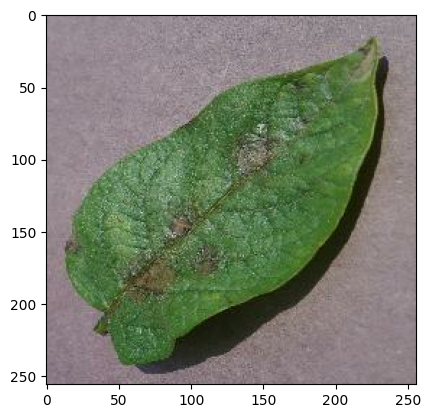

In [22]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_name[first_label])

    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_name[np.argmax(batch_prediction[0])])
     

In [25]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #creating batch

    predictions=model.predict(img_array)
    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    
    

1/1 [==============================] - 0s 41ms/step


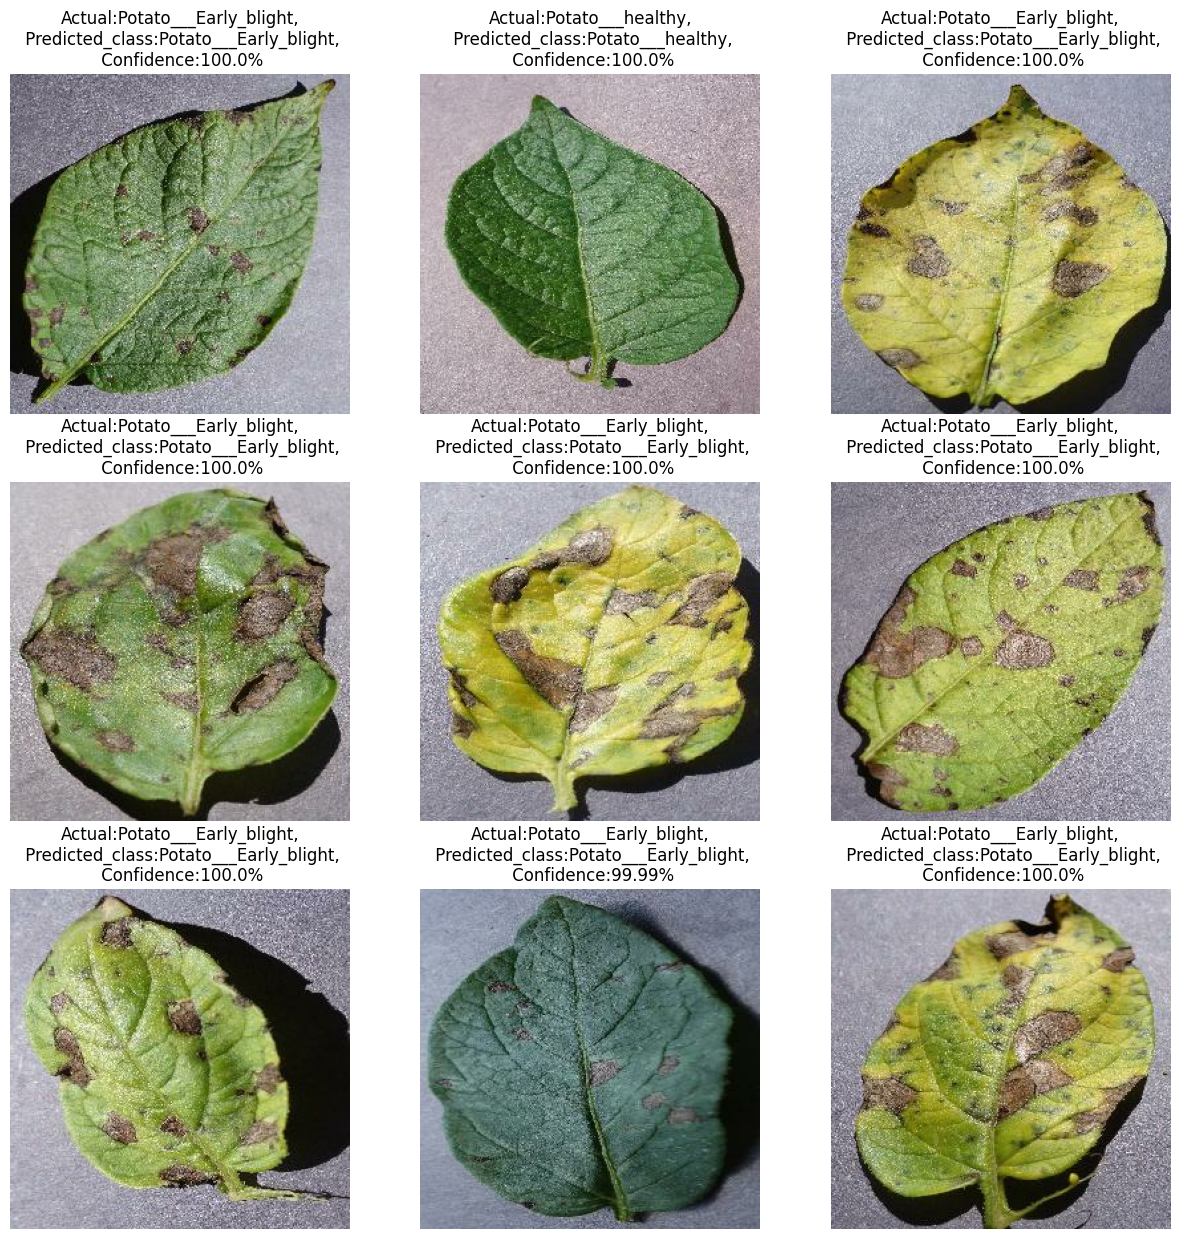

In [26]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_name[labels[i]]

        plt.title(f"Actual:{actual_class},\n Predicted_class:{predicted_class},\n Confidence:{confidence}%")
        plt.axis("off")

In [27]:
model_version=1
model.save(f"Model_1/{model_version}")

INFO:tensorflow:Assets written to: Model_1/1\assets


INFO:tensorflow:Assets written to: Model_1/1\assets


In [28]:
model.save('my_model.h5')